## MNIST preprocessing

In [180]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical

path = 'mnist.pkl.gz'
f = gzip.open(path, 'rb')
training_data, X_val, X_test = pickle.load(f, encoding='latin1')
f.close()

x_train, y_train = training_data[0], training_data[1]
print (x_train.shape, y_train.shape)

X = np.hstack((np.ones((50000,1)),x_train))
Y = y_train
x_test, y_test = X_test[0], X_test[1]
print (x_test.shape, y_test.shape)

x_val, y_val = X_val[0], X_val[1]
print (x_val.shape, y_val.shape)



(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


## Creating a logistic model and optimizing weights

In [181]:
m = 50000
Y = to_categorical(y_train)
theta = np.zeros((785,10))
learning_rate = 0.07
no_of_iterations = 2000
cost_arr = np.empty((0,10))
i = 1

def softmax(x):
    x -= np.max(x)
    result = np.exp(x).T / np.sum(np.exp(x), axis=1)
    return result

for i in range(no_of_iterations):
    
    #hypothesis function
    h = softmax(np.dot(X, np.transpose(theta.T))).T
 
    #cost function 
    cost = -1/m * ((Y * np.log(h)) + ((1-Y) * np.log(1-h)))
    cost = cost.sum(axis = 0)
    cost_arr = np.vstack((cost_arr, cost))
    
    #applying gradient descent to calculate new theta = theta - (learning_rate/m * summation[(h-y)*x]) 
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - np.transpose(delta) 
    print(cost,i)
    i = i + 1;

[0.32209475 0.35487734 0.32367675 0.32952137 0.3188868  0.30337439
 0.32292969 0.33277326 0.31813974 0.32455564] 0
[0.30624565 0.34115916 0.31670859 0.32170809 0.31226122 0.30005812
 0.31435004 0.32346793 0.31401593 0.31909296] 1
[0.29163294 0.32857333 0.30997601 0.31422456 0.3058953  0.29694945
 0.30600885 0.31450532 0.31012973 0.31378097] 2
[0.27811681 0.31680299 0.3034455  0.30702261 0.29975827 0.29395738
 0.29790088 0.30587588 0.30636299 0.30864046] 3
[0.26560537 0.30568925 0.297102   0.30007913 0.29383159 0.2910291
 0.29002678 0.29757327 0.30266303 0.30368211] 4
[0.25402743 0.29514747 0.29093933 0.29338335 0.28810402 0.2881357
 0.28238974 0.28959348 0.29900918 0.2989094 ] 5
[0.24331972 0.28512935 0.28495546 0.28693035 0.28256815 0.28526271
 0.27499367 0.28193325 0.2953956  0.29432092] 6
[0.23342164 0.27560452 0.27915011 0.28071765 0.2772184  0.28240432
 0.26784224 0.27458898 0.29182277 0.28991203] 7
[0.22427367 0.26655124 0.27352343 0.27474336 0.27204991 0.27955975
 0.26093821 0.2

[0.08143487 0.09523512 0.13474293 0.14110824 0.13774641 0.17349221
 0.10414404 0.11812361 0.17093998 0.17028417] 72
[0.08090208 0.0945717  0.13405598 0.14044999 0.13696749 0.17270542
 0.10342267 0.11745091 0.17015642 0.16951624] 73
[0.08038116 0.0939237  0.13338421 0.13980522 0.13620357 0.17193247
 0.10271759 0.11679323 0.16938752 0.16876162] 74
[0.07987171 0.09329057 0.13272709 0.13917352 0.1354542  0.17117299
 0.10202826 0.11615004 0.16863287 0.16801995] 75
[0.07937333 0.09267179 0.13208415 0.13855445 0.13471895 0.17042665
 0.10135414 0.11552087 0.16789207 0.1672909 ] 76
[0.07888563 0.09206684 0.13145492 0.13794763 0.1339974  0.1696931
 0.10069472 0.11490525 0.16716473 0.16657413] 77
[0.07840827 0.09147525 0.13083895 0.13735268 0.13328917 0.16897203
 0.10004952 0.11430274 0.16645047 0.16586932] 78
[0.07794088 0.09089655 0.13023583 0.13676922 0.13259386 0.16826311
 0.09941807 0.11371292 0.16574895 0.16517617] 79
[0.07748315 0.0903303  0.12964515 0.13619692 0.13191111 0.16756605
 0.098

[0.05994543 0.06901485 0.1071274  0.11364857 0.10451674 0.13895393
 0.07547666 0.09123078 0.13719708 0.13621007] 143
[0.05977231 0.06880826 0.10690735 0.11342069 0.10423615 0.13865501
 0.07525141 0.09101828 0.13690911 0.1359112 ] 144
[0.05960115 0.06860408 0.10668986 0.1131953  0.10395858 0.1383592
 0.07502882 0.09080827 0.13662417 0.13561538] 145
[0.05943191 0.06840227 0.10647486 0.11297235 0.103684   0.13806643
 0.07480885 0.09060072 0.13634221 0.13532256] 146
[0.05926456 0.06820278 0.10626232 0.11275181 0.10341234 0.13777666
 0.07459145 0.09039558 0.13606317 0.13503268] 147
[0.05909905 0.06800558 0.10605219 0.11253363 0.10314356 0.13748984
 0.07437656 0.09019281 0.13578701 0.1347457 ] 148
[0.05893536 0.06781061 0.10584442 0.11231777 0.10287761 0.13720592
 0.07416415 0.08999236 0.13551368 0.13446157] 149
[0.05877346 0.06761785 0.10563897 0.11210418 0.10261444 0.13692486
 0.07395417 0.08979419 0.13524314 0.13418026] 150
[0.05861331 0.06742725 0.10543581 0.11189284 0.10235401 0.1366466

[0.05107897 0.05855478 0.09594777 0.10187683 0.09001729 0.1233036
 0.0641126  0.08049715 0.12216793 0.12051807] 214
[0.05098884 0.05844998 0.09583518 0.1017562  0.08986925 0.12314111
 0.06399903 0.08038979 0.12201233 0.12035513] 215
[0.05089939 0.05834599 0.09572345 0.10163645 0.08972233 0.12297976
 0.06388635 0.08028327 0.12185783 0.12019334] 216
[0.05081061 0.05824281 0.09561258 0.10151758 0.0895765  0.12281955
 0.06377454 0.08017757 0.12170443 0.12003271] 217
[0.05072248 0.05814044 0.09550255 0.10139957 0.08943176 0.12266045
 0.0636636  0.0800727  0.12155211 0.1198732 ] 218
[0.050635   0.05803885 0.09539335 0.10128241 0.08928808 0.12250247
 0.06355352 0.07996863 0.12140086 0.11971483] 219
[0.05054816 0.05793804 0.09528497 0.10116609 0.08914546 0.12234558
 0.06344428 0.07986536 0.12125066 0.11955756] 220
[0.05046196 0.05783801 0.0951774  0.10105059 0.08900388 0.12218977
 0.06333587 0.07976287 0.12110151 0.11940138] 221
[0.05037638 0.05773873 0.09507064 0.10093592 0.08886334 0.1220350

[0.04598782 0.05270175 0.08962403 0.09503044 0.08167327 0.1140159
 0.05776187 0.07449135 0.11328729 0.11123461] 285
[0.04593085 0.05263716 0.0895537  0.09495342 0.08158029 0.11391068
 0.05769156 0.07442482 0.11318684 0.11112994] 286
[0.04587421 0.05257295 0.08948377 0.09487682 0.08148784 0.11380602
 0.05762166 0.07435867 0.11308692 0.11102583] 287
[0.04581788 0.05250912 0.08941423 0.09480064 0.08139591 0.11370191
 0.05755216 0.07429291 0.11298752 0.11092229] 288
[0.04576185 0.05244566 0.08934509 0.09472487 0.0813045  0.11359835
 0.05748307 0.07422752 0.11288865 0.1108193 ] 289
[0.04570614 0.05238258 0.08927634 0.09464951 0.08121361 0.11349533
 0.05741437 0.07416251 0.11279031 0.11071687] 290
[0.04565074 0.05231986 0.08920798 0.09457455 0.08112323 0.11339284
 0.05734606 0.07409786 0.11269247 0.11061498] 291
[0.04559563 0.05225751 0.08914    0.09449999 0.08103335 0.11329089
 0.05727815 0.07403359 0.11259515 0.11051364] 292
[0.04554083 0.05219553 0.0890724  0.09442582 0.08094398 0.1131894

[0.04255617 0.04885516 0.08540272 0.09036918 0.07609634 0.10761964
 0.05355479 0.07050628 0.10718614 0.10490113] 357
[0.04251638 0.04881113 0.08535394 0.09031483 0.07603199 0.10754472
 0.05350633 0.0704603  0.10711474 0.10482735] 358
[0.04247676 0.04876732 0.08530538 0.09026071 0.07596794 0.10747012
 0.05345809 0.07041454 0.10704365 0.10475389] 359
[0.04243732 0.04872371 0.08525703 0.09020682 0.07590418 0.10739583
 0.05341007 0.07036898 0.10697286 0.10468075] 360
[0.04239805 0.04868031 0.08520891 0.09015316 0.07584071 0.10732186
 0.05336227 0.07032363 0.10690236 0.10460792] 361
[0.04235896 0.04863711 0.085161   0.09009972 0.07577753 0.10724819
 0.05331469 0.07027848 0.10683216 0.10453541] 362
[0.04232003 0.04859412 0.0851133  0.09004652 0.07571463 0.10717482
 0.05326732 0.07023353 0.10676225 0.10446321] 363
[0.04228128 0.04855133 0.08506581 0.08999354 0.07565202 0.10710176
 0.05322017 0.07018878 0.10669263 0.10439131] 364
[0.04224269 0.04850874 0.08501854 0.08994078 0.07558969 0.107029

[0.04007762 0.04614229 0.08236995 0.0869662  0.07210478 0.10291598
 0.05054915 0.06764929 0.1027061  0.10028957] 429
[0.04004791 0.04611015 0.08233365 0.08692516 0.07205714 0.10285909
 0.05051326 0.06761509 0.10265195 0.10023406] 430
[0.04001831 0.04607814 0.08229748 0.08688427 0.07200967 0.1028024
 0.05047751 0.06758102 0.10259798 0.10017876] 431
[0.03998881 0.04604625 0.08226145 0.08684352 0.07196238 0.10274591
 0.0504419  0.06754707 0.10254421 0.10012366] 432
[0.03995943 0.04601449 0.08222555 0.08680291 0.07191527 0.10268961
 0.05040642 0.06751325 0.10249062 0.10006875] 433
[0.03993015 0.04598286 0.08218978 0.08676245 0.07186834 0.1026335
 0.05037107 0.06747955 0.10243721 0.10001404] 434
[0.03990099 0.04595135 0.08215414 0.08672212 0.07182159 0.10257759
 0.05033586 0.06744598 0.10238399 0.09995952] 435
[0.03987192 0.04591997 0.08211863 0.08668194 0.07177501 0.10252187
 0.05030077 0.06741253 0.10233095 0.09990519] 436
[0.03984297 0.04588871 0.08208326 0.0866419  0.0717286  0.10246634

[0.03818485 0.04411416 0.08005788 0.08433696 0.06907864 0.09926427
 0.04826874 0.06546979 0.09923109 0.09674085] 501
[0.03816164 0.04408954 0.08002953 0.08430451 0.06904165 0.09921912
 0.04824084 0.06544303 0.09918813 0.09669716] 502
[0.03813851 0.04406501 0.08000126 0.08427216 0.06900478 0.0991741
 0.04821303 0.06541636 0.09914531 0.0966536 ] 503
[0.03811545 0.04404056 0.07997309 0.08423991 0.06896802 0.09912922
 0.04818531 0.06538977 0.09910261 0.09661017] 504
[0.03809246 0.0440162  0.079945   0.08420776 0.06893139 0.09908447
 0.04815768 0.06536326 0.09906004 0.09656688] 505
[0.03806954 0.04399192 0.079917   0.0841757  0.06889487 0.09903984
 0.04813014 0.06533683 0.09901759 0.09652371] 506
[0.0380467  0.04396772 0.07988909 0.08414373 0.06885847 0.09899535
 0.04810268 0.06531049 0.09897527 0.09648068] 507
[0.03802393 0.0439436  0.07986126 0.08411187 0.06882219 0.09895099
 0.04807532 0.06528423 0.09893307 0.09643778] 508
[0.03800123 0.04391957 0.07983352 0.08408009 0.06878603 0.0989067

[0.03668208 0.04253332 0.07822015 0.08222345 0.06668833 0.09631894
 0.0464645  0.06373304 0.09643    0.09390038] 573
[0.03666335 0.04251379 0.07819721 0.08219693 0.0666586  0.09628193
 0.04644204 0.06371132 0.09639481 0.09386482] 574
[0.03664467 0.04249431 0.07817434 0.08217048 0.06662895 0.09624501
 0.04641964 0.06368967 0.09635972 0.09382935] 575
[0.03662604 0.04247489 0.07815153 0.0821441  0.06659938 0.0962082
 0.0463973  0.06366807 0.09632471 0.09379398] 576
[0.03660747 0.04245553 0.07812878 0.08211778 0.0665699  0.09617147
 0.04637502 0.06364652 0.0962898  0.0937587 ] 577
[0.03658894 0.04243623 0.07810609 0.08209154 0.0665405  0.09613484
 0.0463528  0.06362504 0.09625497 0.09372351] 578
[0.03657047 0.04241699 0.07808346 0.08206536 0.06651118 0.0960983
 0.04633065 0.06360361 0.09622023 0.09368842] 579
[0.03655205 0.0423978  0.07806089 0.08203925 0.06648195 0.09606186
 0.04630856 0.06358224 0.09618559 0.09365342] 580
[0.03653368 0.04237867 0.07803839 0.08201321 0.06645279 0.0960255


[0.03545411 0.04126164 0.0767136  0.0804742  0.06474158 0.09387502
 0.04499225 0.06230385 0.09410718 0.09155913] 645
[0.03543861 0.04124571 0.07669454 0.08045197 0.06471704 0.09384393
 0.04497367 0.06228573 0.09407764 0.09152944] 646
[0.03542315 0.04122982 0.07667553 0.0804298  0.06469256 0.09381291
 0.04495514 0.06226765 0.09404817 0.09149982] 647
[0.03540773 0.04121397 0.07665656 0.08040767 0.06466814 0.09378196
 0.04493665 0.06224962 0.09401877 0.09147027] 648
[0.03539234 0.04119816 0.07663764 0.0803856  0.06464378 0.09375109
 0.04491821 0.06223162 0.09398943 0.0914408 ] 649
[0.035377   0.04118239 0.07661877 0.08036358 0.06461949 0.09372028
 0.04489982 0.06221367 0.09396017 0.09141139] 650
[0.03536169 0.04116667 0.07659994 0.0803416  0.06459525 0.09368954
 0.04488147 0.06219576 0.09393096 0.09138204] 651
[0.03534642 0.04115099 0.07658115 0.08031968 0.06457108 0.09365887
 0.04486316 0.06217789 0.09390183 0.09135277] 652
[0.03533119 0.04113535 0.07656241 0.08029781 0.06454696 0.093628

[0.03444126 0.04022634 0.07546501 0.07901275 0.06313886 0.09182893
 0.04377779 0.06111393 0.09216395 0.0896105 ] 716
[0.03442815 0.04021302 0.07544881 0.07899371 0.06311813 0.09180225
 0.04376206 0.06109845 0.09213862 0.08958517] 717
[0.03441507 0.04019974 0.07543264 0.07897471 0.06309745 0.09177563
 0.04374638 0.061083   0.09211335 0.08955988] 718
[0.03440203 0.04018648 0.0754165  0.07895575 0.06307682 0.09174906
 0.04373072 0.06106758 0.09208813 0.08953466] 719
[0.03438901 0.04017326 0.07540041 0.07893684 0.06305623 0.09172254
 0.04371511 0.0610522  0.09206296 0.08950948] 720
[0.03437602 0.04016007 0.07538434 0.07891795 0.06303569 0.09169608
 0.04369952 0.06103684 0.09203784 0.08948436] 721
[0.03436306 0.04014691 0.07536831 0.07889911 0.06301519 0.09166967
 0.04368398 0.06102152 0.09201277 0.08945929] 722
[0.03435013 0.04013378 0.07535232 0.07888031 0.06299474 0.09164332
 0.04366846 0.06100623 0.09198775 0.08943427] 723
[0.03433723 0.04012069 0.07533635 0.07886155 0.06297434 0.091617

[0.03354446 0.03931962 0.07435283 0.07770189 0.06172091 0.08999021
 0.04270118 0.06004852 0.09041942 0.08786882] 790
[0.03353328 0.03930837 0.07433891 0.07768543 0.06170322 0.08996709
 0.04268774 0.06003514 0.0903975  0.08784698] 791
[0.03352211 0.03929714 0.07432501 0.077669   0.06168557 0.08994402
 0.04267432 0.06002179 0.09037562 0.08782518] 792
[0.03351097 0.03928593 0.07431114 0.07765259 0.06166796 0.08992099
 0.04266093 0.06000847 0.09035379 0.08780343] 793
[0.03349985 0.03927475 0.0742973  0.07763622 0.06165038 0.089898
 0.04264757 0.05999517 0.09033199 0.08778172] 794
[0.03348876 0.03926359 0.07428349 0.07761988 0.06163284 0.08987506
 0.04263424 0.05998189 0.09031024 0.08776005] 795
[0.03347768 0.03925246 0.0742697  0.07760357 0.06161533 0.08985215
 0.04262093 0.05996864 0.09028852 0.08773842] 796
[0.03346663 0.03924135 0.07425594 0.07758729 0.06159786 0.08982929
 0.04260765 0.05995542 0.09026685 0.08771683] 797
[0.0334556  0.03923027 0.0742422  0.07757104 0.06158043 0.08980647

[0.03279317 0.03856679 0.07341465 0.07658952 0.060533   0.08842703
 0.0417974  0.05914484 0.08893824 0.08639556] 862
[0.03278345 0.03855709 0.07340247 0.07657504 0.06051763 0.08840666
 0.0417857  0.05913307 0.08891896 0.08637641] 863
[0.03277375 0.03854741 0.07339031 0.07656059 0.06050229 0.08838632
 0.04177401 0.05912132 0.08889971 0.0863573 ] 864
[0.03276407 0.03853775 0.07337818 0.07654616 0.06048698 0.08836602
 0.04176235 0.0591096  0.08888049 0.08633821] 865
[0.03275441 0.03852811 0.07336606 0.07653175 0.0604717  0.08834576
 0.04175071 0.05909789 0.0888613  0.08631916] 866
[0.03274476 0.03851849 0.07335397 0.07651737 0.06045644 0.08832553
 0.04173909 0.05908621 0.08884215 0.08630015] 867
[0.03273514 0.03850888 0.0733419  0.07650301 0.06044122 0.08830533
 0.0417275  0.05907454 0.08882302 0.08628116] 868
[0.03272553 0.0384993  0.07332984 0.07648867 0.06042602 0.08828516
 0.04171592 0.05906289 0.08880393 0.08626221] 869
[0.03271594 0.03848973 0.07331781 0.07647436 0.06041085 0.088265

[0.03213699 0.03791391 0.07258921 0.07560593 0.05949487 0.08704226
 0.04100597 0.05834532 0.08762819 0.0850965 ] 934
[0.03212846 0.03790545 0.07257843 0.07559306 0.05948136 0.08702412
 0.04099566 0.05833485 0.08761104 0.08507952] 935
[0.03211994 0.037897   0.07256767 0.0755802  0.05946788 0.08700601
 0.04098537 0.0583244  0.08759392 0.08506257] 936
[0.03211144 0.03788856 0.07255692 0.07556737 0.05945441 0.08698792
 0.0409751  0.05831396 0.08757683 0.08504564] 937
[0.03210295 0.03788014 0.0725462  0.07555456 0.05944098 0.08696987
 0.04096484 0.05830354 0.08755976 0.08502875] 938
[0.03209447 0.03787174 0.07253549 0.07554177 0.05942756 0.08695184
 0.0409546  0.05829313 0.08754272 0.08501188] 939
[0.03208601 0.03786335 0.0725248  0.07552899 0.05941417 0.08693384
 0.04094438 0.05828275 0.08752571 0.08499503] 940
[0.03207756 0.03785498 0.07251413 0.07551624 0.0594008  0.08691586
 0.04093417 0.05827237 0.08750872 0.08497821] 941
[0.03206913 0.03784662 0.07250347 0.07550351 0.05938745 0.086897

[0.03155802 0.03734103 0.07185524 0.07472764 0.05857797 0.08580337
 0.0403055  0.05763046 0.08645828 0.08393935] 1006
[0.03155046 0.03733357 0.0718456  0.07471609 0.05856598 0.08578707
 0.04029633 0.05762106 0.0864429  0.08392415] 1007
[0.0315429  0.03732611 0.07183599 0.07470456 0.05855401 0.08577079
 0.04028718 0.05761166 0.08642754 0.08390898] 1008
[0.03153536 0.03731867 0.07182639 0.07469305 0.05854206 0.08575453
 0.04027804 0.05760228 0.0864122  0.08389383] 1009
[0.03152783 0.03731123 0.0718168  0.07468155 0.05853012 0.0857383
 0.04026891 0.05759292 0.08639689 0.0838787 ] 1010
[0.03152031 0.03730382 0.07180723 0.07467007 0.05851821 0.08572209
 0.0402598  0.05758356 0.0863816  0.0838636 ] 1011
[0.03151281 0.03729641 0.07179767 0.07465861 0.05850632 0.0857059
 0.0402507  0.05757423 0.08636633 0.08384851] 1012
[0.03150532 0.03728902 0.07178812 0.07464716 0.05849444 0.08568973
 0.04024162 0.0575649  0.08635108 0.08383345] 1013
[0.03149783 0.03728163 0.07177859 0.07463573 0.05848258 0.

[0.03104267 0.03683326 0.07119671 0.07393683 0.05776078 0.08468562
 0.03967986 0.05698559 0.08540493 0.08289965] 1078
[0.03103591 0.03682661 0.07118804 0.07392639 0.05775005 0.08467085
 0.03967163 0.05697707 0.08539103 0.08288594] 1079
[0.03102916 0.03681997 0.07117937 0.07391597 0.05773933 0.0846561
 0.03966342 0.05696856 0.08537715 0.08287225] 1080
[0.03102242 0.03681334 0.07117072 0.07390556 0.05772863 0.08464137
 0.03965522 0.05696007 0.08536328 0.08285858] 1081
[0.03101569 0.03680672 0.07116208 0.07389517 0.05771795 0.08462666
 0.03964703 0.05695158 0.08534944 0.08284493] 1082
[0.03100896 0.03680011 0.07115345 0.07388478 0.05770728 0.08461197
 0.03963885 0.0569431  0.08533561 0.0828313 ] 1083
[0.03100225 0.03679351 0.07114483 0.07387442 0.05769663 0.0845973
 0.03963069 0.05693464 0.08532181 0.08281768] 1084
[0.03099555 0.03678692 0.07113623 0.07386407 0.057686   0.08458265
 0.03962253 0.05692619 0.08530802 0.08280409] 1085
[0.03098886 0.03678034 0.07112764 0.07385373 0.05767538 0.

[0.03058045 0.03637922 0.0706013  0.07321969 0.05702675 0.0836698
 0.03911662 0.05639944 0.08444981 0.08195847] 1150
[0.03057436 0.03637325 0.07059343 0.07321019 0.05701707 0.08365634
 0.03910919 0.05639167 0.08443716 0.08194602] 1151
[0.03056828 0.03636729 0.07058556 0.07320071 0.05700741 0.08364289
 0.03910177 0.05638391 0.08442453 0.08193358] 1152
[0.03056221 0.03636133 0.07057771 0.07319124 0.05699777 0.08362945
 0.03909435 0.05637616 0.08441192 0.08192116] 1153
[0.03055615 0.03635539 0.07056987 0.07318178 0.05698813 0.08361604
 0.03908695 0.05636841 0.08439932 0.08190876] 1154
[0.0305501  0.03634945 0.07056204 0.07317233 0.05697851 0.08360264
 0.03907956 0.05636068 0.08438674 0.08189637] 1155
[0.03054406 0.03634352 0.07055421 0.0731629  0.0569689  0.08358925
 0.03907218 0.05635296 0.08437417 0.081884  ] 1156
[0.03053802 0.0363376  0.0705464  0.07315347 0.05695931 0.08357589
 0.03906481 0.05634524 0.08436162 0.08187164] 1157
[0.03053199 0.03633169 0.0705386  0.07314406 0.05694973 0

[0.03016309 0.0359701  0.07005933 0.07256533 0.05636291 0.08274079
 0.03860605 0.05586319 0.0835784  0.08110091] 1222
[0.03015757 0.0359647  0.07005214 0.07255664 0.05635413 0.08272844
 0.03859929 0.05585606 0.08356683 0.08108953] 1223
[0.03015207 0.03595931 0.07004496 0.07254796 0.05634537 0.0827161
 0.03859254 0.05584893 0.08355527 0.08107816] 1224
[0.03014657 0.03595392 0.07003778 0.07253929 0.05633661 0.08270378
 0.0385858  0.05584182 0.08354373 0.08106681] 1225
[0.03014108 0.03594854 0.07003062 0.07253063 0.05632787 0.08269147
 0.03857907 0.05583471 0.0835322  0.08105547] 1226
[0.03013559 0.03594317 0.07002347 0.07252198 0.05631914 0.08267917
 0.03857234 0.05582761 0.08352068 0.08104415] 1227
[0.03013012 0.03593781 0.07001632 0.07251334 0.05631042 0.08266689
 0.03856563 0.05582052 0.08350918 0.08103283] 1228
[0.03012465 0.03593245 0.07000918 0.07250472 0.05630171 0.08265462
 0.03855892 0.05581344 0.08349769 0.08102153] 1229
[0.03011918 0.0359271  0.07000205 0.0724961  0.05629301 0

[0.02979406 0.03560879 0.0695763  0.07198102 0.05577499 0.08190926
 0.03815279 0.05538299 0.08280037 0.08033601] 1292
[0.02978903 0.03560386 0.06956969 0.07197301 0.05576696 0.08189784
 0.0381466  0.05537639 0.0827897  0.08032552] 1293
[0.029784   0.03559894 0.06956308 0.07196501 0.05575894 0.08188644
 0.03814041 0.05536981 0.08277905 0.08031505] 1294
[0.02977898 0.03559402 0.06955648 0.07195702 0.05575093 0.08187505
 0.03813422 0.05536323 0.08276841 0.0803046 ] 1295
[0.02977396 0.03558911 0.06954988 0.07194903 0.05574294 0.08186368
 0.03812805 0.05535666 0.08275778 0.08029415] 1296
[0.02976895 0.03558421 0.0695433  0.07194106 0.05573495 0.08185231
 0.03812188 0.05535009 0.08274716 0.08028372] 1297
[0.02976395 0.03557931 0.06953672 0.07193309 0.05572697 0.08184096
 0.03811572 0.05534354 0.08273656 0.08027329] 1298
[0.02975895 0.03557442 0.06953015 0.07192514 0.055719   0.08182962
 0.03810957 0.05533699 0.08272596 0.08026288] 1299
[0.02975396 0.03556954 0.06952358 0.07191719 0.05571104 

[0.02944707 0.03526919 0.06911853 0.07142643 0.05522123 0.08111804
 0.03772481 0.05492584 0.08206197 0.07961057] 1364
[0.02944246 0.03526468 0.06911243 0.07141903 0.05521387 0.08110747
 0.03771912 0.05491973 0.08205212 0.0796009 ] 1365
[0.02943786 0.03526017 0.06910633 0.07141164 0.05520652 0.08109691
 0.03771343 0.05491363 0.08204227 0.07959123] 1366
[0.02943326 0.03525567 0.06910024 0.07140425 0.05519917 0.08108636
 0.03770774 0.05490753 0.08203244 0.07958158] 1367
[0.02942867 0.03525118 0.06909416 0.07139688 0.05519184 0.08107583
 0.03770207 0.05490144 0.08202262 0.07957193] 1368
[0.02942408 0.03524669 0.06908808 0.07138951 0.05518451 0.0810653
 0.0376964  0.05489536 0.08201281 0.0795623 ] 1369
[0.0294195  0.0352422  0.06908201 0.07138215 0.05517719 0.08105478
 0.03769073 0.05488928 0.08200301 0.07955267] 1370
[0.02941492 0.03523773 0.06907595 0.0713748  0.05516989 0.08104428
 0.03768508 0.05488321 0.08199322 0.07954306] 1371
[0.02941035 0.03523325 0.06906989 0.07136745 0.05516259 0

[0.02912876 0.03495758 0.0686953  0.0709131  0.05471238 0.08038376
 0.03733052 0.05450137 0.08137852 0.07893945] 1436
[0.02912452 0.03495343 0.06868965 0.07090623 0.0547056  0.08037393
 0.03732526 0.05449568 0.08136938 0.07893048] 1437
[0.02912029 0.03494929 0.068684   0.07089938 0.05469882 0.08036411
 0.03732001 0.05449    0.08136025 0.07892152] 1438
[0.02911606 0.03494515 0.06867835 0.07089253 0.05469206 0.0803543
 0.03731476 0.05448433 0.08135113 0.07891257] 1439
[0.02911184 0.03494101 0.06867271 0.07088568 0.0546853  0.08034449
 0.03730952 0.05447866 0.08134202 0.07890362] 1440
[0.02910762 0.03493688 0.06866708 0.07087885 0.05467856 0.0803347
 0.03730428 0.054473   0.08133292 0.07889469] 1441
[0.02910341 0.03493276 0.06866145 0.07087202 0.05467181 0.08032492
 0.03729905 0.05446734 0.08132383 0.07888576] 1442
[0.0290992  0.03492864 0.06865583 0.0708652  0.05466508 0.08031515
 0.03729382 0.05446169 0.08131475 0.07887684] 1443
[0.02909499 0.03492452 0.06865022 0.07085839 0.05465835 0.

[0.0288355  0.03467027 0.06830237 0.07043615 0.05424278 0.07969965
 0.03696568 0.0541057  0.08074348 0.07831603] 1508
[0.02883159 0.03466644 0.06829711 0.07042976 0.05423651 0.07969047
 0.03696081 0.0541004  0.08073497 0.07830768] 1509
[0.02882769 0.03466261 0.06829186 0.07042338 0.05423024 0.07968131
 0.03695594 0.05409509 0.08072648 0.07829934] 1510
[0.02882378 0.03465878 0.06828661 0.070417   0.05422399 0.07967215
 0.03695107 0.05408979 0.08071799 0.07829101] 1511
[0.02881988 0.03465496 0.06828136 0.07041063 0.05421774 0.079663
 0.03694621 0.0540845  0.0807095  0.07828268] 1512
[0.02881599 0.03465114 0.06827612 0.07040427 0.0542115  0.07965386
 0.03694135 0.05407921 0.08070103 0.07827436] 1513
[0.0288121  0.03464733 0.06827088 0.07039791 0.05420526 0.07964472
 0.0369365  0.05407393 0.08069257 0.07826605] 1514
[0.02880821 0.03464352 0.06826565 0.07039156 0.05419903 0.0796356
 0.03693165 0.05406865 0.08068411 0.07825775] 1515
[0.02880433 0.03463971 0.06826043 0.07038521 0.05419281 0.0

[0.02856429 0.03440419 0.06793621 0.06999149 0.05380772 0.07906005
 0.03662676 0.05373562 0.08015136 0.07773478] 1580
[0.02856066 0.03440063 0.0679313  0.06998552 0.0538019  0.07905146
 0.03662222 0.05373064 0.08014341 0.07772698] 1581
[0.02855704 0.03439707 0.06792639 0.06997956 0.05379608 0.07904287
 0.03661769 0.05372567 0.08013548 0.07771919] 1582
[0.02855342 0.03439352 0.06792149 0.06997361 0.05379028 0.07903429
 0.03661316 0.05372071 0.08012755 0.07771141] 1583
[0.02854981 0.03438997 0.06791659 0.06996766 0.05378448 0.07902572
 0.03660863 0.05371575 0.08011963 0.07770363] 1584
[0.0285462  0.03438643 0.0679117  0.06996172 0.05377868 0.07901716
 0.03660411 0.05371079 0.08011171 0.07769586] 1585
[0.0285426  0.03438289 0.06790681 0.06995578 0.05377289 0.07900861
 0.03659959 0.05370584 0.0801038  0.0776881 ] 1586
[0.02853899 0.03437935 0.06790193 0.06994985 0.05376711 0.07900006
 0.03659508 0.0537009  0.0800959  0.07768034] 1587
[0.0285354  0.03437582 0.06789705 0.06994392 0.05376133 

[0.02831255 0.03415677 0.06759384 0.06957565 0.05340323 0.07846017
 0.03631079 0.05338838 0.0795975  0.07719103] 1652
[0.02830918 0.03415346 0.06758924 0.06957007 0.05339781 0.0784521
 0.03630655 0.0533837  0.07959006 0.07718373] 1653
[0.02830582 0.03415014 0.06758464 0.06956449 0.0533924  0.07844404
 0.03630231 0.05337904 0.07958262 0.07717642] 1654
[0.02830246 0.03414684 0.06758005 0.06955891 0.05338699 0.07843598
 0.03629808 0.05337437 0.07957519 0.07716913] 1655
[0.0282991  0.03414353 0.06757546 0.06955334 0.05338158 0.07842793
 0.03629385 0.05336971 0.07956777 0.07716184] 1656
[0.02829574 0.03414023 0.06757088 0.06954777 0.05337619 0.07841988
 0.03628963 0.05336505 0.07956035 0.07715456] 1657
[0.02829239 0.03413693 0.0675663  0.06954221 0.05337079 0.07841184
 0.03628541 0.0533604  0.07955295 0.07714728] 1658
[0.02828904 0.03413363 0.06756172 0.06953665 0.05336541 0.07840381
 0.03628119 0.05335575 0.07954554 0.07714002] 1659
[0.02828569 0.03413034 0.06755715 0.0695311  0.05336002 0

[0.02807815 0.03392587 0.06727272 0.06918569 0.05302595 0.07789594
 0.03601524 0.05306166 0.07907793 0.07668081] 1724
[0.02807501 0.03392277 0.0672684  0.06918044 0.05302089 0.07788833
 0.03601127 0.05305726 0.07907094 0.07667394] 1725
[0.02807187 0.03391968 0.06726408 0.0691752  0.05301583 0.07788074
 0.03600731 0.05305286 0.07906395 0.07666708] 1726
[0.02806873 0.03391658 0.06725977 0.06916996 0.05301078 0.07787315
 0.03600334 0.05304846 0.07905697 0.07666023] 1727
[0.0280656  0.03391349 0.06725546 0.06916473 0.05300573 0.07786556
 0.03599938 0.05304407 0.07905    0.07665338] 1728
[0.02806247 0.0339104  0.06725115 0.0691595  0.05300069 0.07785798
 0.03599542 0.05303968 0.07904303 0.07664653] 1729
[0.02805934 0.03390732 0.06724685 0.06915428 0.05299565 0.07785041
 0.03599147 0.0530353  0.07903607 0.07663969] 1730
[0.02805621 0.03390424 0.06724255 0.06914906 0.05299061 0.07784284
 0.03598752 0.05303091 0.07902911 0.07663286] 1731
[0.02805309 0.03390116 0.06723826 0.06914384 0.05298559 

[0.02786511 0.03371549 0.06697884 0.06882893 0.05268251 0.0773782
 0.03574546 0.0527618  0.07860242 0.07621366] 1794
[0.02786217 0.03371258 0.06697476 0.06882399 0.05267776 0.07737101
 0.03574172 0.05275763 0.07859582 0.07620718] 1795
[0.02785923 0.03370967 0.06697069 0.06881904 0.05267301 0.07736383
 0.03573799 0.05275347 0.07858923 0.0762007 ] 1796
[0.02785629 0.03370676 0.06696662 0.0688141  0.05266827 0.07735665
 0.03573425 0.05274931 0.07858265 0.07619423] 1797
[0.02785335 0.03370386 0.06696256 0.06880917 0.05266353 0.07734948
 0.03573053 0.05274516 0.07857607 0.07618777] 1798
[0.02785042 0.03370096 0.06695849 0.06880424 0.0526588  0.07734231
 0.0357268  0.052741   0.07856949 0.07618131] 1799
[0.02784748 0.03369806 0.06695443 0.06879931 0.05265407 0.07733515
 0.03572308 0.05273686 0.07856293 0.07617485] 1800
[0.02784456 0.03369516 0.06695038 0.06879439 0.05264934 0.07732799
 0.03571936 0.05273271 0.07855636 0.0761684 ] 1801
[0.02784163 0.03369227 0.06694632 0.06878947 0.05264462 0

[0.02766525 0.03351756 0.06670129 0.06849219 0.0523598  0.07688806
 0.03549125 0.05247786 0.07815336 0.07577227] 1864
[0.02766248 0.03351482 0.06669743 0.06848752 0.05235533 0.07688124
 0.03548773 0.05247391 0.07814712 0.07576614] 1865
[0.02765972 0.03351208 0.06669358 0.06848285 0.05235086 0.07687443
 0.0354842  0.05246996 0.07814089 0.07576002] 1866
[0.02765696 0.03350934 0.06668973 0.06847818 0.0523464  0.07686763
 0.03548068 0.05246602 0.07813467 0.07575389] 1867
[0.0276542  0.0335066  0.06668589 0.06847352 0.05234194 0.07686083
 0.03547717 0.05246208 0.07812844 0.07574778] 1868
[0.02765144 0.03350387 0.06668204 0.06846886 0.05233748 0.07685403
 0.03547365 0.05245815 0.07812223 0.07574167] 1869
[0.02764869 0.03350114 0.0666782  0.0684642  0.05233303 0.07684724
 0.03547014 0.05245421 0.07811602 0.07573556] 1870
[0.02764594 0.03349841 0.06667437 0.06845955 0.05232859 0.07684046
 0.03546663 0.05245028 0.07810981 0.07572946] 1871
[0.02764319 0.03349568 0.06667054 0.0684549  0.05232414 

[0.02746948 0.03332308 0.06642761 0.06816043 0.05204319 0.07640365
 0.03524116 0.05219721 0.07771067 0.07533686] 1937
[0.02746689 0.0333205  0.06642396 0.06815602 0.05203899 0.07639719
 0.03523783 0.05219347 0.07770477 0.07533106] 1938
[0.02746429 0.03331792 0.06642032 0.0681516  0.05203479 0.07639074
 0.03523451 0.05218973 0.07769888 0.07532527] 1939
[0.0274617  0.03331533 0.06641668 0.06814719 0.05203059 0.07638429
 0.03523119 0.05218599 0.077693   0.07531948] 1940
[0.0274591  0.03331276 0.06641305 0.06814279 0.05202639 0.07637785
 0.03522787 0.05218226 0.07768712 0.07531369] 1941
[0.02745652 0.03331018 0.06640942 0.06813839 0.0520222  0.07637141
 0.03522455 0.05217853 0.07768124 0.07530791] 1942
[0.02745393 0.0333076  0.06640578 0.06813399 0.05201802 0.07636498
 0.03522124 0.0521748  0.07767537 0.07530213] 1943
[0.02745134 0.03330503 0.06640216 0.06812959 0.05201383 0.07635855
 0.03521793 0.05217108 0.0776695  0.07529636] 1944
[0.02744876 0.03330246 0.06639853 0.0681252  0.05200965 

## Cost vs. number of iterations for all classes

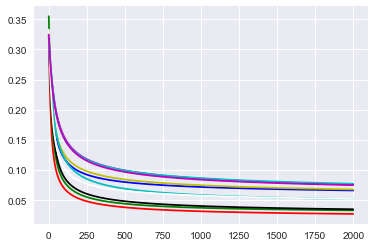

In [182]:

plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.plot(cost_arr[:,3], label='class 3', c='y')
plt.plot(cost_arr[:,4], label='class 4', c='c')
plt.plot(cost_arr[:,5], label='class 5', c='m')
plt.plot(cost_arr[:,6], label='class 6', c='k')
plt.plot(cost_arr[:,7], label='class 7', c='w')
plt.plot(cost_arr[:,8], label='class 8', c='c')
plt.plot(cost_arr[:,9], label='class 9', c='m')

plt.show()

In [183]:

#no of test samples
test_m = x_test.shape[0]
x_test = np.hstack((np.ones((test_m,1)),x_test))

#predict 
pred = np.zeros((test_m,10))
model_predict = softmax(np.dot(x_test, np.transpose(theta.T)))
model_predict = model_predict.T
print(model_predict.shape)
model_predict = model_predict.tolist() 
i = [[max(per_v), per_v.index(max(per_v))] for per_v in model_predict]
i = np.asarray(i)
i = i.T
Predicted = i[1]


(10000, 10)


In [184]:
from sklearn.metrics import confusion_matrix

np.savetxt("logistic.csv", Predicted, delimiter=",")
print(y_test.shape)
print(Predicted)
conf_mat = confusion_matrix(Predicted, y_test)
print(conf_mat)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

(10000,)
[7. 2. 1. ... 4. 5. 6.]
[[ 956    0   11    4    1   10   13    3    8   11]
 [   0 1105    8    1    4    4    3   15    9    7]
 [   2    2  903   21    5    4    4   22    7    4]
 [   2    3   14  911    1   41    3    7   27   12]
 [   1    0   15    0  912    9   13    8    9   42]
 [   6    3    1   28    0  760   10    0   23    9]
 [   9    4   13    4   10   17  908    0   13    0]
 [   1    1   17   12    2   10    1  936   13   21]
 [   3   17   42   20    8   30    3    3  853    6]
 [   0    0    8    9   39    7    0   34   12  897]]
Overall accuracy: 91.41 %


## USPS

In [194]:
from PIL import Image
import os
import numpy as np

#USPS data preprocessing
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []


for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
usps_data = np.array(USPSMat) 
usps_lables = np.array(USPSTar)

In [195]:
from sklearn.metrics import confusion_matrix

#no of test samples
test_m = usps_data.shape[0]
usps_data = np.hstack((np.ones((test_m,1)),usps_data))

#predict 
pred = np.zeros((test_m,10))
model_predict = softmax(np.dot(usps_data, np.transpose(theta.T)))
model_predict = model_predict.T
print(model_predict.shape)
model_predict = model_predict.tolist() 
i = [[max(per_v), per_v.index(max(per_v))] for per_v in model_predict]
i = np.asarray(i)
i = i.T
Predicted = i[1]

np.savetxt("logistic_usps.csv", Predicted, delimiter=",")
print(usps_lables.shape)
print(Predicted)
conf_mat = confusion_matrix(Predicted, usps_lables)
print(conf_mat)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

(19999, 10)
(19999,)
[9. 2. 0. ... 9. 1. 3.]
[[ 548  176  165   77   42  138  273  159  193   32]
 [   2  345   21    1   77   19   10  217   29  164]
 [ 320  168 1221  140   44  201  392  320  151  154]
 [  61  327  154 1288   59  166  105  460  217  477]
 [ 240  258   55   20  994   40   97   69  121  147]
 [ 215  103  121  301  160 1190  333  155  720  118]
 [  90   32   87   14   42  108  693   26  110   14]
 [  67  395   87   67  160   72   22  348   52  404]
 [ 127  176   63   52  258   42   42  193  340  300]
 [ 330   20   25   40  164   24   33   53   67  190]]
Overall accuracy: 35.78678933946697 %
